# Sample Solution Showcase

The sample solution is based around the class ```System``` and its subclasses ```SystemPreDefined``` and ```SystemGenerated``` which each relate to different kinds of input conditions. 

The equations are solved using ```scipy.integrate.solve_ivp```, which is written in the ```solve_system``` method of the ```System``` class. The ```derivatives``` function in this function calculated the rate of change of each isomer by multiplying the current populations (as a vector) by a pre-computed matrix. This matrix is calculated in the constructor for each of the subclasses. For instance, if Isomer A decays to Isomer B with a decay rate of 1/s, and Isomer B decays to the stable Isomer C with a decay rate of 2/s, then the matrix would be:

$$
\left(\begin{array}{ccc} 
-1 & 0 & 0 \\
1 & -2 & 0 \\
0 & 2 & 0
\end{array}\right)
$$

This could be multiplied by the current populations in the form:

$$
\left(\begin{array}{c} 
N_{A}  \\
N_{B}  \\
N_{C} 
\end{array}\right)
$$

to give the rate of change of each isomer. This structure was chosen to aid the speed of the solution - the derivative function is very simple and includes only a single call to ```np.matmul``` which will execute very quickly, speeding up the code overall.

The ```System``` class also contains the definition of the ```plot_results``` method which uses Matplotlib to plot a simple figure of the results.

## SystemPreDefined

The ```SystemPreDefined``` class is focused around simulating a system with a linear, specified decay chain (i.e. Isomer A decays to Isomer B, which decays to Isomer C and so on). As a result, it does not read any isomer data from the endf files. The constructor accepts the initial populations of each isomer, the decay rates of each isomer, and the names of each isomer. The constructor also constructs the matrix to be used later. Once these values have been provided, we only need to call the ```solve_system``` method to solve the system.

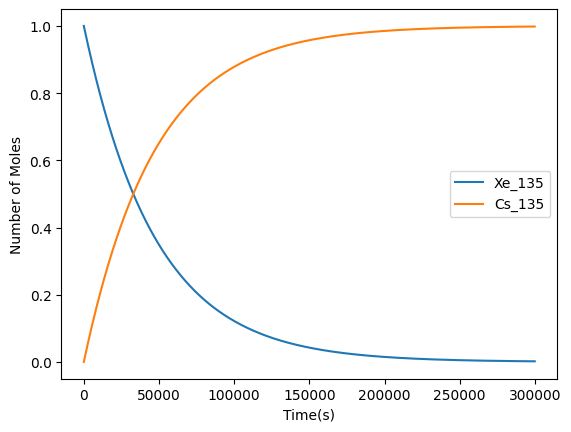

In [2]:
%reload_ext autoreload
%autoreload 2

import sys
sys.path.append("..")
from sample_solution.system_pre_defined import SystemPreDefined
import numpy as np

system = SystemPreDefined((1, 0), (2.1065e-5, 0), ("Xe_135", "Cs_135"))

system.solve_system(np.arange(0, 3e5, 100))

system.plot_results()

## SystemGenerated

The ```SystemGenerated``` class is designed to be given a dictionary specifying the names and populations of different isomers present. It will then use the ```IsomerData``` class to read the data from the relevant endf files, find which isomers are produced in the resulting decay chain(s) and also read the data from the files relevant to those isomers. It then constructs the matrix to use later when ```solve_system``` is called.

This implementation still has many limitations, including:
* Branching decay chains are not taken into account
* Only alpha emission, beta decay, and electron capture decays are taken into account
* Unusual formatting cases in the endf file are not taken into account

A more fully-fledged version of this model would correct these limitations.

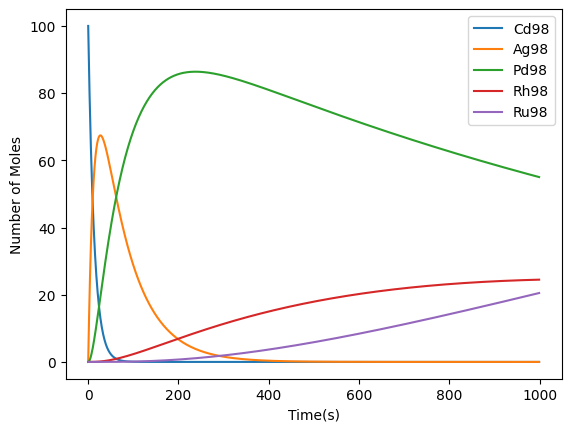

In [5]:
%reload_ext autoreload
%autoreload 2

import sys
sys.path.append("..")
from sample_solution.system_generated import SystemGenerated
import numpy as np

system = SystemGenerated({"Cd98":100}, "../decay_data/")

system.solve_system(np.arange(1000))

system.plot_results()